<a href="https://colab.research.google.com/github/NicoPatalagua/Scikit-learn/blob/master/Copia_de_Sci_Kit_Learn_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo D: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".



- Para el ejemplo la variable dependiente ($Target$) es R_SALINITY


## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [0]:
import numpy as np #Soporte para vectores y matrices
import pandas as pd #Manipulación y análisis de datos 
import seaborn as sns #Graficos elegantes 
import matplotlib.pyplot as plt #Diseño y realización de graficas
#incorporar las gráficas en este documento
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split #Dividir dataset en trenes aleatorios y subconjuntos de prueba
from sklearn.linear_model import LinearRegression #Regresión lineal de mínimos cuadrados ordinarios.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Error cuadratico medio, error absoluto medio y r2 score.

## 2.- Exporación y preparación del conjunto de datos 

In [0]:
#Exportamos el dataset
ObjData=pd.read_csv('bottle.csv')
#Presentar la cabecera del dataset
ObjData.head(4)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,9,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Presentar la cantidad de filas y columnas:
ObjData.shape

(6937, 74)

In [0]:
#Limpiamos el dataset
ObjData=ObjData.dropna(1)
ObjData.shape

(6937, 13)

In [0]:
#Presentar la cabecera del dataset limpio
ObjData.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,RecInd,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,3,9,9,9,9,9,0.0,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,3,9,9,9,9,9,8.0,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,7,9,9,9,9,9,10.0,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,3,9,9,9,9,9,19.0,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,7,9,9,9,9,9,20.0,20


In [0]:
ObjData1=ObjData['Sta_ID'].str.split(' ',expand=True)
ObjData1.rename(columns={0:'Sta_ID1',1:'Sta_ID2'},inplace=True)
ObjData=ObjData.drop('Sta_ID',axis=1)
ObjData['Sta_ID1']=ObjData1['Sta_ID1']
ObjData['Sta_ID2']=ObjData1['Sta_ID2']
ObjData.head()

,Cst_Cnt,Btl_Cnt,Depth_ID,Depthm,RecInd,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_PRES,Sta_ID1,Sta_ID2
0,1,1,19-4903CR-HY-060-0930-05400560-0000A-3,0,3,9,9,9,9,9,0.0,0,054.0,056.0
1,1,2,19-4903CR-HY-060-0930-05400560-0008A-3,8,3,9,9,9,9,9,8.0,8,054.0,056.0
2,1,3,19-4903CR-HY-060-0930-05400560-0010A-7,10,7,9,9,9,9,9,10.0,10,054.0,056.0
3,1,4,19-4903CR-HY-060-0930-05400560-0019A-3,19,3,9,9,9,9,9,19.0,19,054.0,056.0
4,1,5,19-4903CR-HY-060-0930-05400560-0020A-7,20,7,9,9,9,9,9,20.0,20,054.0,056.0


In [0]:
print("Columnas: ",ObjData.columns)
print("Número de columnas: ",ObjData.shape[1])
print("Número de filas: ",ObjData.shape[0])

Columnas:  Index(['Cst_Cnt', 'Btl_Cnt', 'Depth_ID', 'Depthm', 'RecInd', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_PRES', 'Sta_ID1',
       'Sta_ID2'],
      dtype='object')
Número de columnas:  14
Número de filas:  6937


In [0]:
#Contamos valores por R_Depth
ObjData['R_Depth'].value_counts()

10.0      236
30.0      236
0.0       235
20.0      235
50.0      235
         ... 
440.0       1
528.0       1
344.0       1
532.0       1
1284.0      1
Name: R_Depth, Length: 749, dtype: int64

In [0]:
#Exploramos un poco los datos
print("Información del dataset:\n")
ObjData.info()

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cst_Cnt   6937 non-null   int64  
 1   Btl_Cnt   6937 non-null   int64  
 2   Depth_ID  6937 non-null   object 
 3   Depthm    6937 non-null   int64  
 4   RecInd    6937 non-null   int64  
 5   NH3q      6937 non-null   int64  
 6   C14A1q    6937 non-null   int64  
 7   C14A2q    6937 non-null   int64  
 8   DarkAq    6937 non-null   int64  
 9   MeanAq    6937 non-null   int64  
 10  R_Depth   6937 non-null   float64
 11  R_PRES    6937 non-null   int64  
 12  Sta_ID1   6937 non-null   object 
 13  Sta_ID2   6937 non-null   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 758.9+ KB


In [0]:
#Realizamos un resumen estadistico
print("Resumen estadístico:")
ObjData.describe().T

Resumen estadístico:


,count,mean,std,min,25%,50%,75%,max
Cst_Cnt,6937.0,646.471674,3262.533328,1.0,57.0,114.0,172.0,24814.0
Btl_Cnt,6937.0,16745.632550,80903.195755,1.0,1735.0,3469.0,5203.0,606937.0
Depthm,6937.0,339.505550,352.875379,0.0,50.0,198.0,584.0,1547.0
RecInd,6937.0,5.293787,1.961174,3.0,3.0,7.0,7.0,7.0
NH3q,6937.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0
C14A1q,6937.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0
C14A2q,6937.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0
DarkAq,6937.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0
MeanAq,6937.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0
R_Depth,6937.0,339.505550,352.875379,0.0,50.0,198.0,584.0,1547.0


In [0]:
#Usamos 'R_Depth (Profundidad R) como variable tarjet
ObjData.rename(columns={'R_Depth':'target'},inplace=True)
ObjData.head()

,Cst_Cnt,Btl_Cnt,Depth_ID,Depthm,RecInd,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,target,R_PRES,Sta_ID1,Sta_ID2
0,1,1,19-4903CR-HY-060-0930-05400560-0000A-3,0,3,9,9,9,9,9,0.0,0,054.0,056.0
1,1,2,19-4903CR-HY-060-0930-05400560-0008A-3,8,3,9,9,9,9,9,8.0,8,054.0,056.0
2,1,3,19-4903CR-HY-060-0930-05400560-0010A-7,10,7,9,9,9,9,9,10.0,10,054.0,056.0
3,1,4,19-4903CR-HY-060-0930-05400560-0019A-3,19,3,9,9,9,9,9,19.0,19,054.0,056.0
4,1,5,19-4903CR-HY-060-0930-05400560-0020A-7,20,7,9,9,9,9,9,20.0,20,054.0,056.0


## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

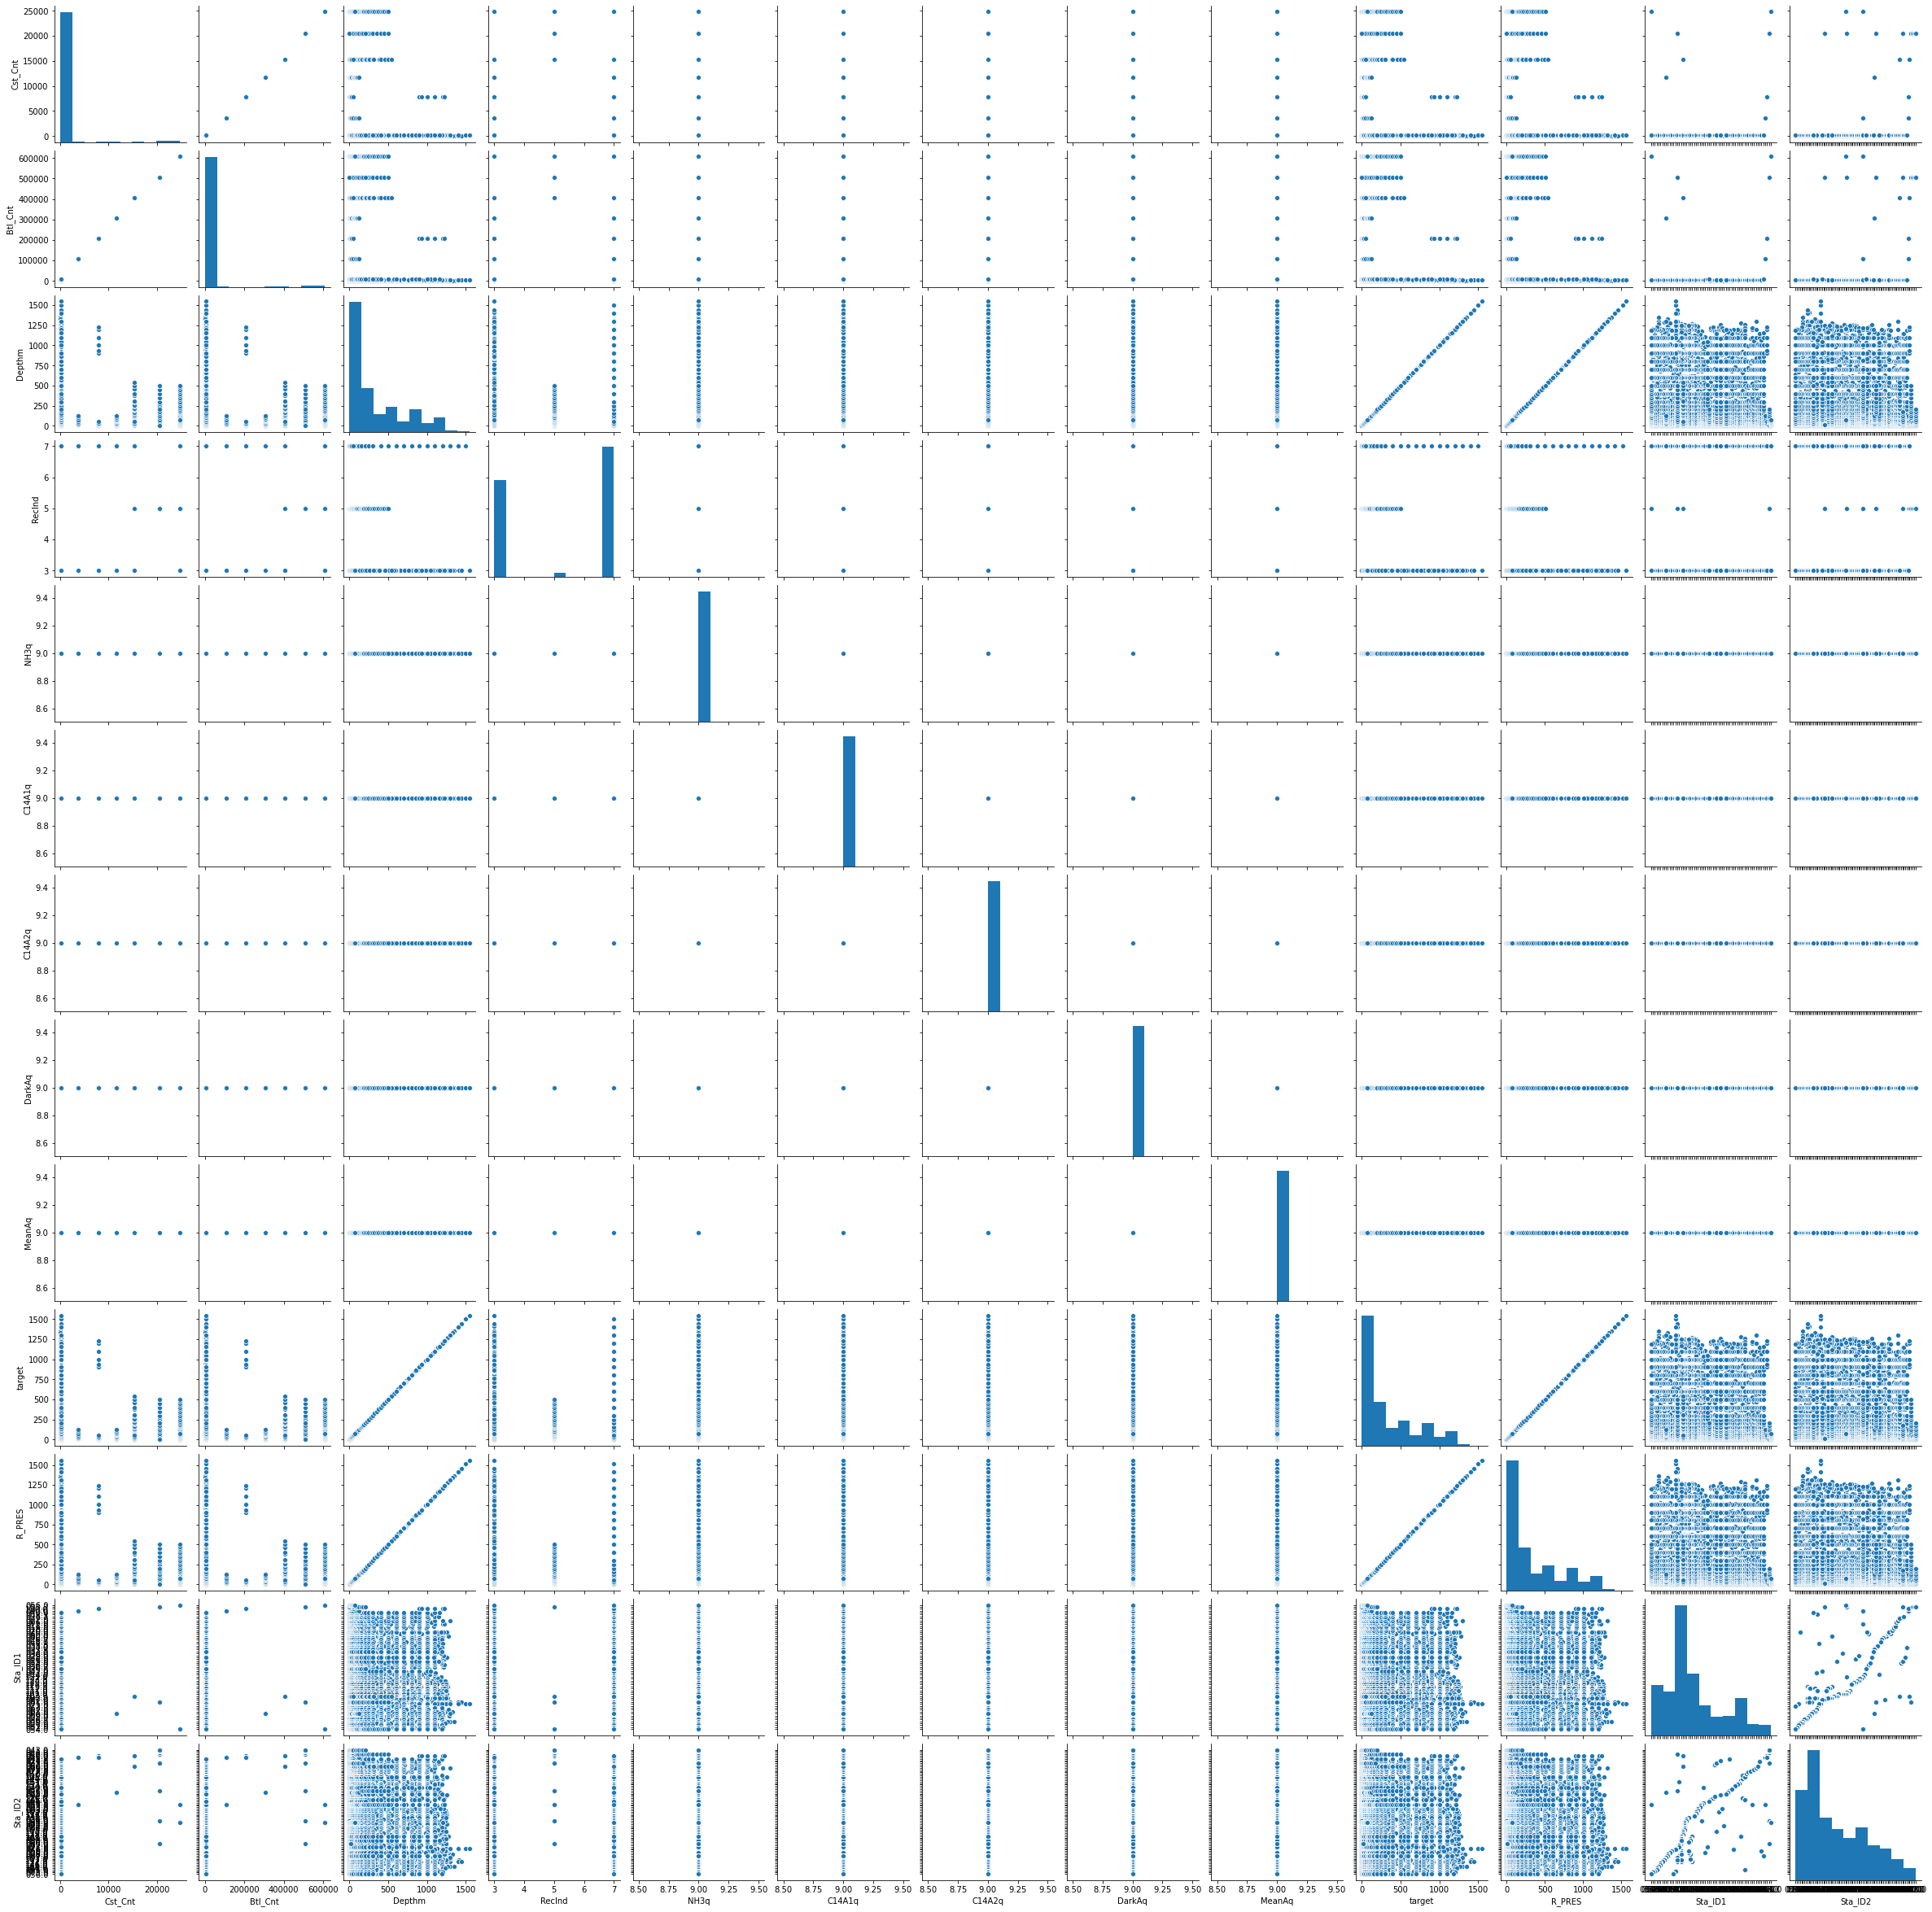

In [0]:
#Dispersion par por variables
sns.pairplot(ObjData)

Grafico de distribución


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


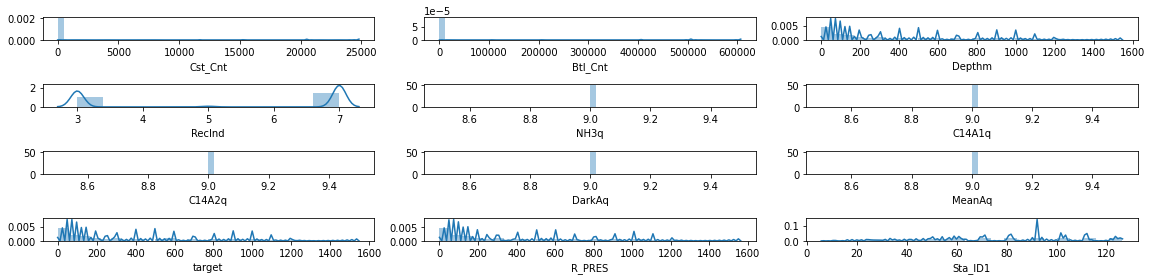

In [0]:
# Grafica de distribución 
print("Grafico de distribución")
ObjFilas = 4
ObjColumnas =3
ObjData1=ObjData
ObjData1=ObjData1.drop('Depth_ID',axis=1)
fig, ax = plt.subplots(nrows=ObjFilas, ncols=ObjColumnas, figsize=(16,4))
columna = ObjData1.columns
index = 0
for i in range(ObjFilas):
    for j in range(ObjColumnas):
        sns.distplot(ObjData1[columna[index]], ax = ax[i][j], kde_kws={'bw':0.1})
        index = index + 1
plt.tight_layout()

In [0]:
#Matriz de Correlación
matrixCorrelacion =ObjData.corr()
matrixCorrelacion

,Cst_Cnt,Btl_Cnt,Depthm,RecInd,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,target,R_PRES
Cst_Cnt,1.000000,0.999586,-0.095413,-0.030008,NaN,NaN,NaN,NaN,NaN,-0.095413,-0.095374
Btl_Cnt,0.999586,1.000000,-0.095784,-0.030266,NaN,NaN,NaN,NaN,NaN,-0.095784,-0.095745
Depthm,-0.095413,-0.095784,1.000000,0.161589,NaN,NaN,NaN,NaN,NaN,1.000000,0.999999
RecInd,-0.030008,-0.030266,0.161589,1.000000,NaN,NaN,NaN,NaN,NaN,0.161589,0.161490
NH3q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C14A1q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C14A2q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DarkAq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MeanAq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,-0.095413,-0.095784,1.000000,0.161589,NaN,NaN,NaN,NaN,NaN,1.000000,0.999999


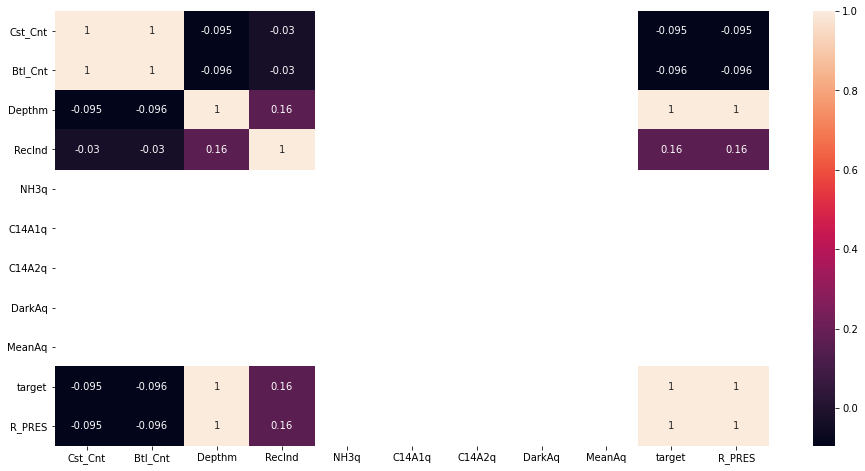

In [0]:
#Realizamos el mapa de calor
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(matrixCorrelacion, annot=True)

Función para seleccionar $features$ con relación a la variable $target$. De esta forma se evita la MULTICOLLINEARITY

In [0]:
def relacionFeatures(correlacionData, umbral):
    feature = []
    valor = []
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index]) > umbral:
            feature.append(index)
            valor.append(correlacionData[index])    
    df  = pd.DataFrame(data = valor, index = feature, columns=['Valor Correlación'])
    return df

In [0]:
# umbral > 0.45
umbral = 0.45
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
valorCorrelacion

,Valor Correlación
Depthm,1.000000
target,1.000000
R_PRES,0.999999


In [0]:
#Representamos los datos de correlación correctos 
dataCorrAceptada = ObjData[valorCorrelacion.index]
dataCorrAceptada.head()

,Depthm,target,R_PRES
0,0,0.0,0
1,8,8.0,8
2,10,10.0,10
3,19,19.0,19
4,20,20.0,20


## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Selección de Variables Dep e Ind.
- División Valores en bloques de Entrenamiento y Prueba
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [0]:
#Seleccionamos las variables dependiente e independiente
X = dataCorrAceptada.drop('target', axis = 1)
y = dataCorrAceptada['target']

In [0]:
#Division de valores en bloques de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Seleccionamos el modelo lineal
modelo=LinearRegression()

## 5.- Entrenamiento del Modelo

In [0]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = modelo.predict(X_test)

In [0]:
# Impresión de intercepción, coeficientes y numero de coeficientes
print('Coeficiente: ',modelo.coef_)
print('Tamaño coeficiente: ',len(modelo.coef_))
print('Intercepción: ',modelo.intercept_)

Coeficiente:  [ 1.00000000e+00 -3.55564865e-15]
Tamaño coeficiente:  2
Intercepción:  -2.2737367544323206e-13


In [0]:
d = {'Predicted': y_predict, 'target': y_test}
df = pd.DataFrame(data=d)
decimals = 1
df['Predicted'] = df['Predicted'].apply(lambda x: round(x, decimals))
df.head(10)

,Predicted,target
4696,189.0,189.0
5543,297.0,297.0
2584,837.0,837.0
3075,800.0,800.0
1891,250.0,250.0
134,100.0,100.0
4800,1000.0,1000.0
5779,150.0,150.0
558,30.0,30.0
2913,300.0,300.0


## 6.- Métricas y Evaluación del Modelo

Se calcula

mse (Error Cuadrático Medio ).

* mae (Error Medio Absoluto).
* score ( r2_score</a>).
* mae : Fácil de entender, dado que es el error promedio.
* mse : Es más popular que $mae$, dado que $mse$ castiga grandes errores, útil en el mundo real.
* score: r2_score Es incluso más popular que $mse$, dado que $rmse$ es interpretable en las unidades $"y"$
   *  Esta no es una función simétrica. A diferencia de la mayoría de las otras puntuaciones, la puntuación R^2 puede ser negativa (no tiene por qué ser el cuadrado de una cantidad R).
   * Esta métrica no está bien definida para muestras individuales y devolverá un valor de NaN si n_muestras es menor que dos.

In [0]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r2_score: ', score)
print('MAE: ', mae)
print('MSE: ', mse)

r2_score:  1.0
MAE:  1.8481022028129147e-13
MSE:  4.629271199752562e-26


In [0]:
#Función para almacenar las métricas de rendimiento
total_features = []
valor_correlacion = []
r2_valores = []
mse_valores = []
mae_valores = []

In [0]:
def metricas_evaluacion(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    total_features.append(len(features.columns)-1)
    valor_correlacion.append(umb)
    r2_valores.append(puntuacion)
    mse_valores.append(mse)
    mae_valores.append(mae)
    dfMetricas = pd.DataFrame(data=[total_features,valor_correlacion,r2_valores,mse_valores,mae_valores],
                             index=['#features','Umbral','R2','MSE','MAE'])
    return dfMetricas.T

In [0]:
#Evaluación del modelo según metricas
metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict)

,#features,Umbral,R2,MSE,MAE
0,2.0,0.45,1.0,4.629271e-26,1.848102e-13


## 7.- Pruebas con diferentes umbrales de correlación

In [0]:
#Entrenamiento automatico dado el "dataCorrAceptada" por su umbral
def obtener_y_predict(data_Correlacionado):
    X = dataCorrAceptada.drop('target', axis = 1)
    y = dataCorrAceptada['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)  
    return y_predict

In [0]:
#Probamos el score con un umbral de >0.1
umbral = 0.1
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

        Valor Correlación
Depthm           1.000000
RecInd           0.161589
target           1.000000
R_PRES           0.999999 

      Depthm  RecInd  target  R_PRES
6932      42       3    42.0      42
6933      50       7    50.0      50
6934      52       3    52.0      52
6935      62       3    62.0      62
6936      71       3    71.0      71 

   #features  Umbral   R2           MSE           MAE
0        2.0    0.45  1.0  4.629271e-26  1.848102e-13
1        3.0    0.10  1.0  8.610123e-26  2.496085e-13 



In [0]:
#Probamos el score con un umbral de >0.2
umbral = 0.2
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

        Valor Correlación
Depthm           1.000000
target           1.000000
R_PRES           0.999999 

      Depthm  target  R_PRES
6932      42    42.0      42
6933      50    50.0      50
6934      52    52.0      52
6935      62    62.0      62
6936      71    71.0      71 

   #features  Umbral   R2           MSE           MAE
0        2.0    0.45  1.0  4.629271e-26  1.848102e-13
1        3.0    0.10  1.0  8.610123e-26  2.496085e-13
2        2.0    0.20  1.0  4.629271e-26  1.848102e-13 



In [0]:
#Probamos el score con un umbral de >0.3
umbral = 0.3
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

        Valor Correlación
Depthm           1.000000
target           1.000000
R_PRES           0.999999 

      Depthm  target  R_PRES
6932      42    42.0      42
6933      50    50.0      50
6934      52    52.0      52
6935      62    62.0      62
6936      71    71.0      71 

   #features  Umbral   R2           MSE           MAE
0        2.0    0.45  1.0  4.629271e-26  1.848102e-13
1        3.0    0.10  1.0  8.610123e-26  2.496085e-13
2        2.0    0.20  1.0  4.629271e-26  1.848102e-13
3        2.0    0.30  1.0  4.629271e-26  1.848102e-13 



In [0]:
#Probamos el score con un umbral de >0.4
umbral = 0.4
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

        Valor Correlación
Depthm           1.000000
target           1.000000
R_PRES           0.999999 

      Depthm  target  R_PRES
6932      42    42.0      42
6933      50    50.0      50
6934      52    52.0      52
6935      62    62.0      62
6936      71    71.0      71 

   #features  Umbral   R2           MSE           MAE
0        2.0    0.45  1.0  4.629271e-26  1.848102e-13
1        3.0    0.10  1.0  8.610123e-26  2.496085e-13
2        2.0    0.20  1.0  4.629271e-26  1.848102e-13
3        2.0    0.30  1.0  4.629271e-26  1.848102e-13
4        2.0    0.40  1.0  4.629271e-26  1.848102e-13 



In [0]:
#Probamos el score con un umbral de >0.5
umbral = 0.5
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

        Valor Correlación
Depthm           1.000000
target           1.000000
R_PRES           0.999999 

      Depthm  target  R_PRES
6932      42    42.0      42
6933      50    50.0      50
6934      52    52.0      52
6935      62    62.0      62
6936      71    71.0      71 

   #features  Umbral   R2           MSE           MAE
0        2.0    0.45  1.0  4.629271e-26  1.848102e-13
1        3.0    0.10  1.0  8.610123e-26  2.496085e-13
2        2.0    0.20  1.0  4.629271e-26  1.848102e-13
3        2.0    0.30  1.0  4.629271e-26  1.848102e-13
4        2.0    0.40  1.0  4.629271e-26  1.848102e-13
5        2.0    0.50  1.0  4.629271e-26  1.848102e-13 



In [0]:
#Probamos el score con un umbral de >0.8
umbral = 0.8
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

        Valor Correlación
Depthm           1.000000
target           1.000000
R_PRES           0.999999 

      Depthm  target  R_PRES
6932      42    42.0      42
6933      50    50.0      50
6934      52    52.0      52
6935      62    62.0      62
6936      71    71.0      71 

   #features  Umbral   R2           MSE           MAE
0        2.0    0.45  1.0  4.629271e-26  1.848102e-13
1        3.0    0.10  1.0  8.610123e-26  2.496085e-13
2        2.0    0.20  1.0  4.629271e-26  1.848102e-13
3        2.0    0.30  1.0  4.629271e-26  1.848102e-13
4        2.0    0.40  1.0  4.629271e-26  1.848102e-13
5        2.0    0.50  1.0  4.629271e-26  1.848102e-13
6        2.0    0.80  1.0  4.629271e-26  1.848102e-13 

